---
title: 06 - FPI
subtitle: Fast Plasma Investigation
---

> - For an event/spacecraft of your choice from MMS (other than MMS3 for the event in the above crib provided), introduce L2 FPI ion and electron moments and eflux energy spectrograms. Explain what the region of space is (why the data are consistent with that region). Magnetic field is always useful to include. Use a geophysical coordinate system (GSM, GSE a
>   \et al., Science 2016 and Torbert et al., Science 2018.
> - Using standard tools in mms_part_products, obtain gyro-velocity spectra of high-energy (5-10keV or 20-30keV) ions. Can you tell the gradient of those ions at the magnetopause, or the plasma sheet boundary layer from their duskward anisotropy?
> - Also using mms_part_products, obtain pitch angle spectra from FPI for low (100-1000eV) and high (10-20keV) electrons in a region surrounding magnetic reconnection (1-2min before and after). Can you tell where the anisotropy reverses from towards to away from the RX region? How do you interpret this reversal?

We choose MMS for this question. And the data is from 2015-10-16 13:00-14:00UT.

Its locations plot together with related quicklook plots are shown below copied from [@burch2016] paper.

:::{.column-page layout-nrow=1}
![Locations of the four MMS spacecraft during the magnetopause crossing investigated in this study.](https://www.science.org/cms/10.1126/science.aaf2939/asset/31a10bb9-7848-4676-93e7-be72c67cedfb/assets/graphic/352_aaf2939_f2.jpeg)

![Summary data for two magnetopause crossings of MMS2 on 16 October 2015.](https://www.science.org/cms/10.1126/science.aaf2939/asset/9e226fa3-80f0-4210-bd72-79fd4126bc64/assets/graphic/352_aaf2939_f3.jpeg)

:::

FPI visualizations are shown below obtained from [MMS/FPI Website](https://fpi.gsfc.nasa.gov/#/).

:::{.column-page layout-nrow=1}

![](images/mms1_event_A03_overview.svg)

![](images/mms1_event_A03.svg)
:::


In [115]:
# | code-fold: true
import pyspedas
from pytplot import tplot, store_data, get_data, options, tplot_copy
import pytplot

In [84]:
trangeOfInterest = ["2015-10-16T13:05:30", "2015-10-16T13:08:30"]
mms_num = "3"
fpi_data_rate = "brst"

In [26]:
mms_sc = "mms" + mms_num
mms_sc_f = mms_sc + "_"
fpi_dr_f = "_" + fpi_data_rate

In [13]:
pyspedas.mms.fgm(trange=trangeOfInterest, probe=mms_num, time_clip=True)
pyspedas.mms.fpi(
    trange=trangeOfInterest, probe=mms_num, time_clip=True, data_rate=fpi_data_rate
)

09-Dec-23 08:23:04: Loading /Users/zijin/data/mms/mms3/fgm/srvy/l2/2015/10/mms3_fgm_srvy_l2_20151016_v4.18.0.cdf
09-Dec-23 08:23:09: Time clip was applied to: mms3_fgm_b_gse_srvy_l2
09-Dec-23 08:23:09: Time clip was applied to: mms3_fgm_b_gsm_srvy_l2
09-Dec-23 08:23:09: Time clip was applied to: mms3_fgm_b_dmpa_srvy_l2
09-Dec-23 08:23:09: Time clip was applied to: mms3_fgm_b_bcs_srvy_l2
09-Dec-23 08:23:10: Time clip was applied to: mms3_fgm_flag_srvy_l2
09-Dec-23 08:23:10: Time clip was applied to: mms3_fgm_r_gse_srvy_l2
09-Dec-23 08:23:10: Time clip was applied to: mms3_fgm_r_gsm_srvy_l2
09-Dec-23 08:23:10: Time clip was applied to: mms3_fgm_hirange_srvy_l2
09-Dec-23 08:23:10: Time clip was applied to: mms3_fgm_bdeltahalf_srvy_l2
09-Dec-23 08:23:10: Time clip was applied to: mms3_fgm_stemp_srvy_l2
09-Dec-23 08:23:11: Time clip was applied to: mms3_fgm_etemp_srvy_l2
09-Dec-23 08:23:11: Time clip was applied to: mms3_fgm_mode_srvy_l2
09-Dec-23 08:23:11: Loaded variables:
09-Dec-23 08:23

## Part 1


In [75]:
fgm_tvars2plot = ["fgm_b_gsm_srvy_l2_bvec"]
i_energy_spectr_tvar = ["dis_energyspectr_omni"]
e_energy_spectr_tvar = ["des_energyspectr_omni"]


fgm_tvars2plot_f = [mms_sc_f + tvar for tvar in fgm_tvars2plot]
i_energy_spectr_tvars_f = [mms_sc_f + tvar + fpi_dr_f for tvar in i_energy_spectr_tvar]
e_energy_spectr_tvars_f = [mms_sc_f + tvar + fpi_dr_f for tvar in e_energy_spectr_tvar]

### Density panel


In [ ]:
numberdensity_tvars = ["des_numberdensity", "dis_numberdensity"]
numberdensity_tvars_f = [mms_sc_f + tvar + fpi_dr_f for tvar in numberdensity_tvars]

numberdensity_panel = mms_sc_f + "numberdensity" + fpi_dr_f

store_data(numberdensity_panel, numberdensity_tvars_f)
options(numberdensity_panel, "Color", ["black", "red"])
options(numberdensity_panel, "ytitle", "Number \n density")

### Velocity panel


In [ ]:
i_velocity_tvar = "dis_bulkv_gse"
e_velocity_tvar = "des_bulkv_gse"

i_velocity_panel = mms_sc_f + i_velocity_tvar + fpi_dr_f
e_velocity_panel = mms_sc_f + e_velocity_tvar + fpi_dr_f

options(i_velocity_panel, "ytitle", "Ion \n velocity")
options(e_velocity_panel, "ytitle", "Electron \n velocity")

### Temperature panel


In [ ]:
i_temperature_tvars = ["dis_temppara", "dis_tempperp"]
e_temperature_tvars = ["des_temppara", "des_tempperp"]


i_temperature_tvars_f0 = [mms_sc_f + tvar + fpi_dr_f for tvar in i_temperature_tvars]
e_temperature_tvars_f0 = [mms_sc_f + tvar + fpi_dr_f for tvar in e_temperature_tvars]

i_temperature_panel = mms_sc_f + "dis_temp" + fpi_dr_f
e_temperature_panel = mms_sc_f + "des_temp" + fpi_dr_f

store_data(i_temperature_panel, i_temperature_tvars_f0)
options(i_temperature_panel, "Color", ["blue", "red"])
options(i_temperature_panel, "ytitle", "Ion \n temperature")

store_data(e_temperature_panel, e_temperature_tvars_f0)
options(e_temperature_panel, "Color", ["blue", "red"])
options(e_temperature_panel, "ytitle", "Electron \n temperature")

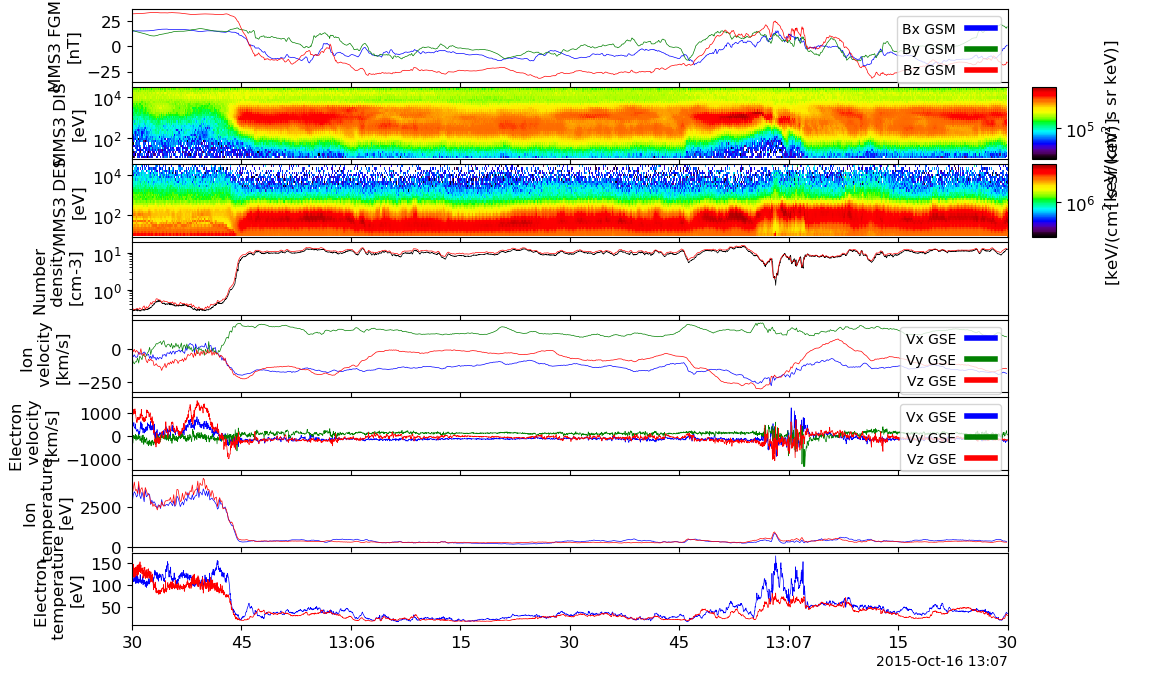

In [76]:
tvars2plot = (fgm_tvars2plot_f + i_energy_spectr_tvars_f + e_energy_spectr_tvars_f) + [
    numberdensity_panel,
    i_velocity_panel,
    e_velocity_panel,
    i_temperature_panel,
    e_temperature_panel,
]
tplot(tvars2plot)

## Part 2


In [85]:
from pyspedas.mms.particles.mms_part_getspec import mms_part_getspec

help(mms_part_getspec)

Help on function mms_part_getspec in module pyspedas.mms.particles.mms_part_getspec:

mms_part_getspec(instrument='fpi', probe='1', species='e', data_rate='fast', trange=None, output=['energy', 'theta', 'phi', 'pa', 'gyro'], units='eflux', energy=None, phi=None, theta=None, pitch=None, gyro=None, mag_data_rate=None, scpot_data_rate=None, fac_type='mphigeo', center_measurement=False, spdf=False, correct_photoelectrons=False, internal_photoelectron_corrections=False, disable_photoelectron_corrections=False, zero_negative_values=False, regrid=[32, 16], no_regrid=False)
    Generate spectra and moments from 3D MMS particle data
    
    Parameters
    ----------
        trange: list of str
            Time range
    
        units: str
            Specify units of output variables; must be 'eflux' to calculate moments
    
            valid options:
            'flux'   -  # / (cm^2 * s * sr * eV)
            'eflux'  -  eV / (cm^2 * s * sr * eV)  <default>
            'df_cm'  -  s^3 / cm

In [81]:
mms_part_getspec(
    trange=trangeOfInterest,
    probe=mms_num,
    species="i",
    data_rate=fpi_data_rate,
    output="energy",
    units="eflux",
)
# mms_part_getspec(instrument='fpi',\
#            probe=mmsnum, species='i',\
#            data_rate='fast',trange=time2zoom, output='energy', units='eflux',\
#            regrid=[32, 16])

09-Dec-23 09:44:47: Loading /Users/zijin/data/mms/mms3/fpi/brst/l2/dis-dist/2015/10/16/mms3_fpi_brst_l2_dis-dist_20151016130524_v3.3.0.cdf
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_errorflags_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_compressionloss_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_steptable_parity_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_startdelphi_count_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_startdelphi_angle_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_phi_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_dist_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_disterr_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_sector_despinp_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_energy_brst
09-Dec-23 09:44:48: Time clip was applied to: mms3_dis_energy_delta_brst
09-Dec-23 09:44:48: The name mms3_dis_pitchangdist_lowen_brst is curr

['mms3_dis_dist_brst_energy']

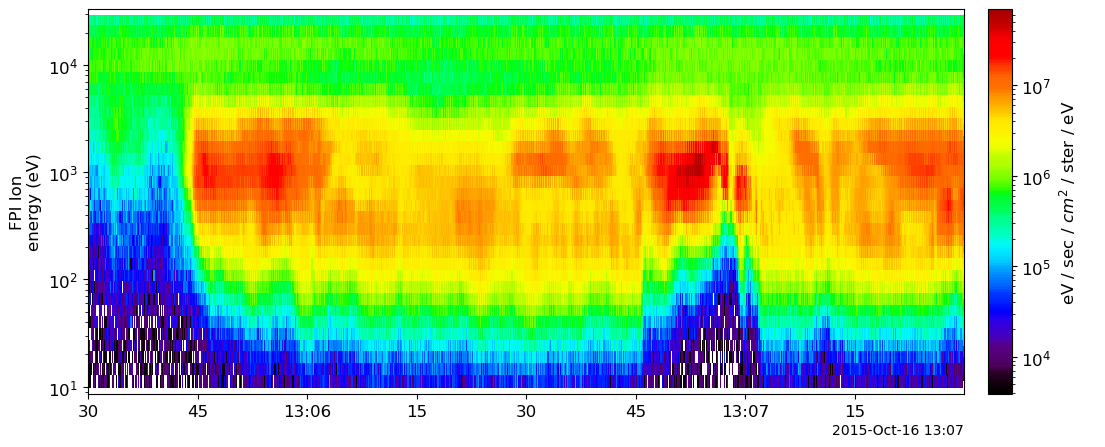

In [82]:
tplot("mms3_dis_dist_brst_energy")

## Part 3

> Also using mms_part_products, obtain pitch angle spectra from FPI for low (100-1000eV) and high (10-20keV) electrons in a region surrounding magnetic reconnection (1-2min before and after). Can you tell where the anisotropy reverses from towards to away from the RX region? How do you interpret this reversal?

Particles that travel parallel and antiparallel to the magnetic field are respectively located near the bottom and the top of the pitch angle spectrum.

We can see that

Note: `burst` mode data is super slow to calculate the spectra. So we use `fast` mode data instead.

In [ ]:
from pyspedas import tcopy

In [93]:
fpi_data_rate = "fast"

low_energy_range = [100, 1e3]
high_energy_range = [1e4, 3e4]

In [96]:
temp_tvar = mms_part_getspec(
    trange=trangeOfInterest,
    probe=mms_num,
    species="e",
    data_rate=fpi_data_rate,
    units="eflux",
    output="pa",
    energy=low_energy_range
)

tcopy(temp_tvar[0], "low_energy_electron_pa")

temp_tvar = mms_part_getspec(
    trange=trangeOfInterest,
    probe=mms_num,
    species="e",
    data_rate=fpi_data_rate,
    units="eflux",
    output="pa",
    energy=high_energy_range
)
tplot_copy(temp_tvar[0], "high_energy_electron_pa")

temp_tvar = mms_part_getspec(
    trange=trangeOfInterest,
    probe=mms_num,
    species="e",
    data_rate=fpi_data_rate,
    units="eflux",
    output="pa",
    energy=high_energy_range
)
tcopy(temp_tvar[0], "high_energy_electron_pa")


09-Dec-23 10:17:07: Loading /Users/zijin/data/mms/mms3/fpi/fast/l2/des-dist/2015/10/mms3_fpi_fast_l2_des-dist_20151016120000_v3.4.0.cdf
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_errorflags_fast
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_startdelphi_count_fast
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_startdelphi_angle_fast
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_dist_fast
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_disterr_fast
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_avgf1counts_fast
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_energy_fast
09-Dec-23 10:17:08: Time clip was applied to: mms3_des_energy_delta_fast
09-Dec-23 10:17:08: Loaded variables:
09-Dec-23 10:17:08: Epoch
09-Dec-23 10:17:08: Epoch_plus_var
09-Dec-23 10:17:08: Epoch_minus_var
09-Dec-23 10:17:08: mms3_des_errorflags_fast
09-Dec-23 10:17:08: mms3_des_compressionloss_fast
09-Dec-23 10:17:08: mms3_des_startdelphi_count_fast
09-Dec-23 

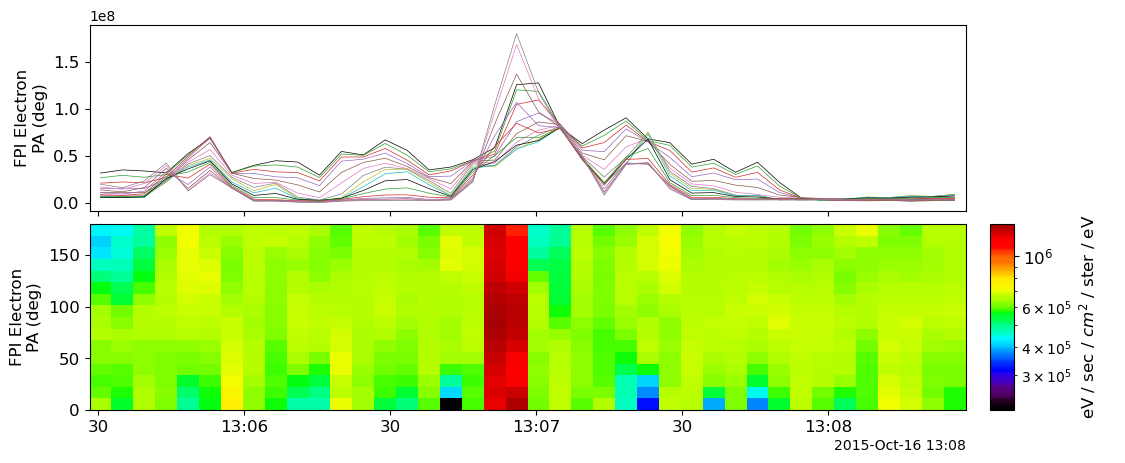

In [114]:
tplot(["low_energy_electron_pa", "high_energy_electron_pa"])

## Notes

I have released a cribsheet "myexample_FPI_mom_part_spectra" for doing moments and enegry/angle spectra calculations using pyspedas. The crib sheet (.pyspd) and its Jupytr notebook (.ipynb) along with 2 plots they produce are in mms_BE_FPI_pyspd_cribs.zip. They show you how to make moments, and energy, phi, theta, pitch angle and gyrophase spectrograms for ions and electrons from MMS L2 data.

Note that energy spectra and moments already exist as L2 products. The routines I mention create additional angle spectrograms that are useful for analysis.

There are some problems with mms_part_getspec, the basic routine for doing the above spectra. (I have informed the software team and they will resolve these problems soon enough.) The major bugs are:

- The ion moments computation does not produce good results (plotted in the second figure, and compared to L2 moments you can simply load and plot in the first figure) so you cannot yet trust them. The symptom is that the computed ion density is too high and the ion velocity compared to the directly-loaded ion moments. This may be simply an issue of setting the right keywords in the computation and making them default or at least documenting them. Electron moments seem fine.

- The pitch-angle spectrogram computation for ions or electrons does not produce anything. I have commented out the calls producing them.

The crib sheet only applies the above moments and spectrogram calc's to 5 minutes of fast survey data. Some take several minutes to complete but some take less than 1 minute. Some are un-necessarily long and I have informed the team on methods to accelerate them. For now, you can see them run one at a time and can plot the results, and digest them, while another one is running in the background.

These are similar to routines that already exist in IDL for both THEMIS and MMS, but in PySPEDAS only the MMS ones are currently available. The tools are generic enough and will be implemented on THEMIS and other spacecraft in the future.
